In [1]:
# import modules%pylab inline
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import librosa
import numpy as np
import pandas as pd
from librosa import display

In [2]:
x, sr = librosa.load('PEPstock.wav')
print x.shape, sr

(42275,) 22050


In [3]:
ipd.Audio(x, rate=sr)

In [4]:
hop_length = 512
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length)
print onset_frames # frame numbers of estimated onsets

[ 5  8 11 13 16 25 28 35 39 47 54 58 61 66 70 79 82]


In [5]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)
print onset_times

[0.11609977 0.18575964 0.2554195  0.30185941 0.37151927 0.58049887
 0.65015873 0.81269841 0.90557823 1.09133787 1.25387755 1.34675737
 1.41641723 1.53251701 1.62539683 1.83437642 1.90403628]


In [6]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)
print onset_samples

[ 2560  4096  5632  6656  8192 12800 14336 17920 19968 24064 27648 29696
 31232 33792 35840 40448 41984]


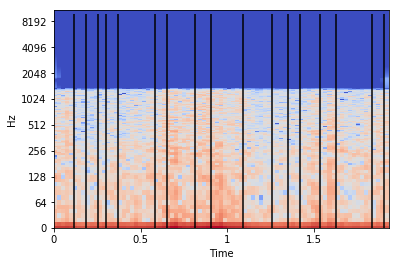

In [7]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [8]:
def concatenate_segments(x, onset_samples, pad_duration=0.500):
    """Concatenate segments into one signal."""
    silence = numpy.zeros(int(pad_duration*sr)) # silence
    frame_sz = min(numpy.diff(onset_samples))   # every segment has uniform frame size
    return numpy.concatenate([
        numpy.concatenate([x[i:i+frame_sz], silence]) # pad segment with silence
        for i in onset_samples
    ])

In [9]:

concatenated_signal = concatenate_segments(x, onset_samples, 0.500)

In [10]:
ipd.Audio(concatenated_signal, rate=sr)

In [11]:
onset_frames = librosa.onset.onset_detect(x, sr=sr, hop_length=hop_length, backtrack=True)

In [12]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)

In [13]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)

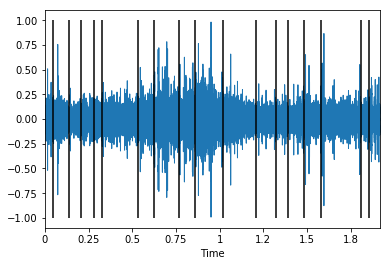

In [14]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

In [15]:
data = pd.read_csv('daily_adjusted_PEP.csv')

In [16]:
data

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2019-05-03,127.10,128.1800,126.9200,127.67,127.6700,2608275,0.0,1.0
1,2019-05-02,127.24,127.5500,126.1700,126.83,126.8300,2875936,0.0,1.0
2,2019-05-01,127.85,128.0000,127.0100,127.24,127.2400,3810811,0.0,1.0
3,2019-04-30,127.05,128.3900,126.3400,128.05,128.0500,4963611,0.0,1.0
4,2019-04-29,126.14,126.9600,126.0200,126.69,126.6900,2793384,0.0,1.0
5,2019-04-26,126.52,127.2450,126.1150,126.40,126.4000,3033876,0.0,1.0
6,2019-04-25,125.65,126.3999,125.1800,126.13,126.1300,4433718,0.0,1.0
7,2019-04-24,127.41,127.9800,126.6700,126.92,126.9200,3517173,0.0,1.0
8,2019-04-23,126.68,127.5400,126.1200,127.09,127.0900,4464139,0.0,1.0
9,2019-04-22,126.77,127.2400,125.8800,126.44,126.4400,3707004,0.0,1.0


In [17]:
close = data["close"]

In [18]:
close

0       127.67
1       126.83
2       127.24
3       128.05
4       126.69
5       126.40
6       126.13
7       126.92
8       127.09
9       126.44
10      127.09
11      127.01
12      122.41
13      123.66
14      122.23
15      121.67
16      122.04
17      122.17
18      122.00
19      121.62
20      121.47
21      121.56
22      121.68
23      122.00
24      122.55
25      121.84
26      121.89
27      122.02
28      120.85
29      120.72
         ...  
5338     36.50
5339     36.00
5340     35.63
5341     35.56
5342     35.75
5343     35.38
5344     35.25
5345     35.44
5346     35.19
5347     36.50
5348     36.13
5349     36.88
5350     36.44
5351     36.06
5352     36.44
5353     36.31
5354     36.88
5355     37.00
5356     37.63
5357     36.69
5358     35.94
5359     36.69
5360     36.50
5361     35.38
5362     34.75
5363     35.88
5364     35.88
5365     35.19
5366     36.50
5367     36.00
Name: close, Length: 5368, dtype: float64

In [19]:
volume = data["volume"]
volume

0        2608275
1        2875936
2        3810811
3        4963611
4        2793384
5        3033876
6        4433718
7        3517173
8        4464139
9        3707004
10       6331152
11       7318172
12       5263742
13       4419849
14       3501129
15       3399742
16       2681090
17       3864363
18       3140147
19       3971535
20       3022470
21       4534426
22       3242608
23       5025662
24       5758805
25       3694740
26       5318490
27       4583158
28       4275527
29       6668099
          ...   
5338     3557800
5339     3617300
5340     3806500
5341     5350700
5342     3082100
5343     4182800
5344     4812400
5345     6322700
5346    15324300
5347     3962000
5348     2563300
5349     2384000
5350     2836800
5351     2979300
5352     2119100
5353     2637600
5354     2702700
5355     2688200
5356     4202400
5357     3478200
5358     2027100
5359     3460400
5360     3309000
5361     4438700
5362     5114600
5363     2920700
5364     2971000
5365     43913

In [20]:
volume.max()

34963700

In [21]:
time = data["timestamp"]
time

0       2019-05-03
1       2019-05-02
2       2019-05-01
3       2019-04-30
4       2019-04-29
5       2019-04-26
6       2019-04-25
7       2019-04-24
8       2019-04-23
9       2019-04-22
10      2019-04-18
11      2019-04-17
12      2019-04-16
13      2019-04-15
14      2019-04-12
15      2019-04-11
16      2019-04-10
17      2019-04-09
18      2019-04-08
19      2019-04-05
20      2019-04-04
21      2019-04-03
22      2019-04-02
23      2019-04-01
24      2019-03-29
25      2019-03-28
26      2019-03-27
27      2019-03-26
28      2019-03-25
29      2019-03-22
           ...    
5338    1998-02-13
5339    1998-02-12
5340    1998-02-11
5341    1998-02-10
5342    1998-02-09
5343    1998-02-06
5344    1998-02-05
5345    1998-02-04
5346    1998-02-03
5347    1998-02-02
5348    1998-01-30
5349    1998-01-29
5350    1998-01-28
5351    1998-01-27
5352    1998-01-26
5353    1998-01-23
5354    1998-01-22
5355    1998-01-21
5356    1998-01-20
5357    1998-01-16
5358    1998-01-15
5359    1998

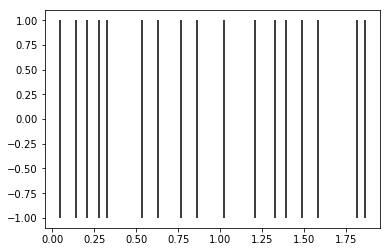

In [22]:
plt.vlines(onset_times, -1, 1, color='k')

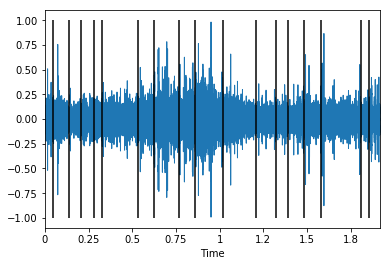

In [23]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')

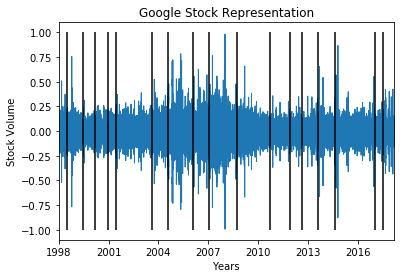

In [24]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.title("Google Stock Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume')

#plt.yticks(list(range(100, 0,-20)))

In [25]:
[z for z in range(1998,2019,3)]

[1998, 2001, 2004, 2007, 2010, 2013, 2016]

In [26]:
[tick*.0714 for tick in range(0,7)]

[0.0, 0.0714, 0.1428, 0.2142, 0.2856, 0.35700000000000004, 0.4284]

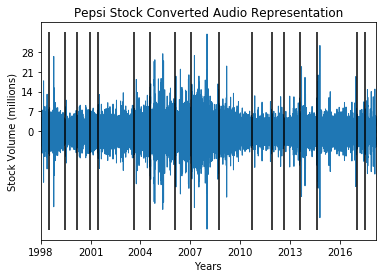

In [28]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
librosa.display.waveplot(x, sr=sr, x_axis='time')
plt.vlines(onset_times, -1, 1, color='k')
#plt.xticks(list(range(1998, 2019, 3))) 

yearly_time = ([tick*.0714 for tick in range(0,7)],[z for z in range(1998,2019,3)])

plt.xticks([tick*.285 for tick in range(0,7)],[z for z in range(1998,2019,3)])

#plt.yticks(100, 1000, 500)

#plt.yticks(np.arange(0, 82, step=10))

plt.yticks([tick*.2 for tick in range(0,5)],[z for z in range(0,34,7)])

#max volume of 34,963,700

plt.title("Pepsi Stock Converted Audio Representation")

plt.xlabel('Years')
plt.ylabel('Stock Volume (millions)')

#plt.yticks(list(range(100, 0,-20)))

